In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
df = pd.read_csv("ForestFireDataset.csv")

In [29]:
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Test Forest 1,40,45,20,1
1,Test Forest 2,50,30,10,1
2,Test Forest 3,10,20,70,0
3,Test Forest 4,60,45,70,1
4,Test Forest 5,30,48,10,1


In [30]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,234.000000,234.000000,234.000000,234.000000
mean,33.846154,33.794872,36.282051,0.512821
std,23.478824,16.050638,27.744341,0.500907
min,0.000000,0.000000,0.000000,0.000000
25%,11.000000,20.000000,12.000000,0.000000
50%,30.000000,35.000000,30.000000,1.000000
75%,50.000000,45.000000,65.000000,1.000000
max,89.000000,60.000000,100.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             234 non-null    object
 1   Oxygen           234 non-null    int64 
 2   Temperature      234 non-null    int64 
 3   Humidity         234 non-null    int64 
 4   Fire Occurrence  234 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


In [32]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df.drop(['Area'],axis='columns').corr()

,Oxygen,Temperature,Humidity,Fire Occurrence
Oxygen,1.000000,0.288074,-0.175256,0.582598
Temperature,0.288074,1.000000,-0.118993,0.785044
Humidity,-0.175256,-0.118993,1.000000,-0.358807
Fire Occurrence,0.582598,0.785044,-0.358807,1.000000


In [35]:
df.drop('Area', axis=1, inplace=True)

In [37]:
X=df.drop('Fire Occurrence',axis=1)
y=df['Fire Occurrence']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

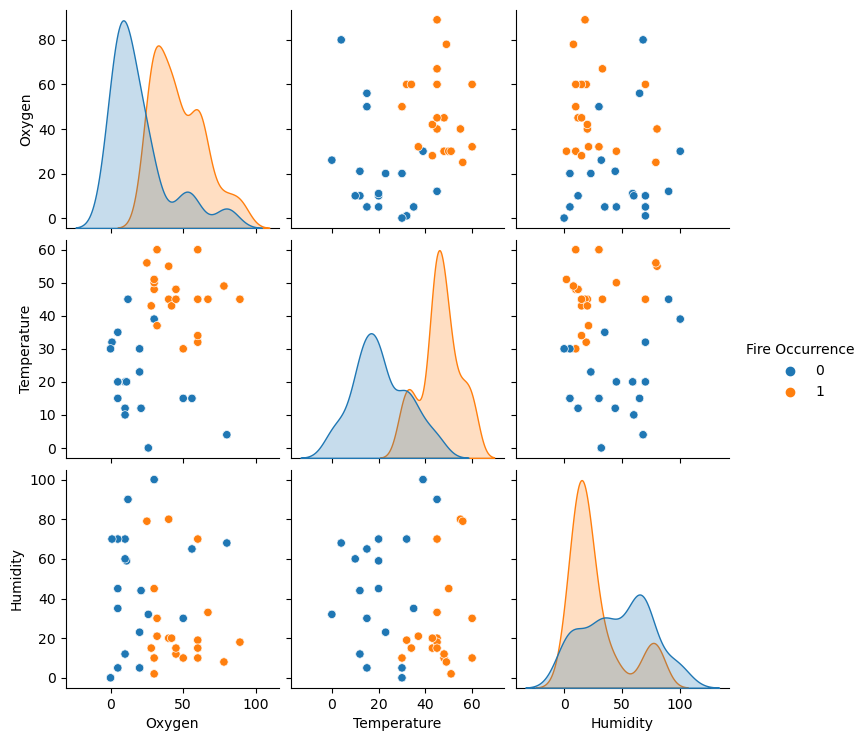

In [41]:
sns.pairplot(df, hue='Fire Occurrence')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
model=LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
model.score(X_test,y_test)

1.0

In [46]:
y_pred=model.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [48]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[44  0]
 [ 0 27]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        27

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



In [49]:
import joblib

In [50]:
joblib.dump(model, 'forest_model.pkl')

['forest_model.pkl']

In [51]:
loaded_model = joblib.load('forest_model.pkl')

In [52]:
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = loaded_model.predict(sample_data)
print("Prediction for sample data:", prediction)

Prediction for sample data: [0]
